<a href="https://colab.research.google.com/github/prog815/portfOptim/blob/master/%D0%9E%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B8%D1%80%D1%83%D0%B5%D0%BC_%D0%BF%D0%BE%D1%80%D1%82%D1%84%D0%B5%D0%BB%D1%8C_%D0%BF%D0%BE_%D0%BC%D0%B0%D0%BA%D1%81%D0%B8%D0%BC%D1%83%D0%BC_%D0%BA%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82%D0%B0_%D0%A8%D0%B0%D1%80%D0%BF%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Оптимизируем портфель по максимум коэффициента Шарпа

Проект "Оптимизация инвестиционного портфеля".

https://github.com/prog815/portfOptim

Енин А.В.

Оренбург - 2020

14.09.2020

Сравниваем равномерное распределение и по Марковицу (с наивысшим коэффициентом Шарпа).

# Подгружаем библиотеки

In [ ]:
!pip install bt

     |████████████████████████████████| 2.7MB 2.9MB/s 
  Created wheel for bt: filename=bt-0.2.7-cp36-cp36m-linux_x86_64.whl size=533309 sha256=84e744debec2d06dd8922c384d9af4e7c2ff25992871568f0b4a8df7708208bc
  Stored in directory: /root/.cache/pip/wheels/ae/8a/a2/a679757e4e7219e6f17727d1422d4ce32da847678c6559da35
  Created wheel for ffn: filename=ffn-0.3.4-cp36-none-any.whl size=22813 sha256=f7716e66e31f4fd9cd6406ab358b8040623003b075ab3d9b7f53a75855328e31
  Stored in directory: /root/.cache/pip/wheels/20/08/4d/921180e81279d147cb6399fe1e194f2c67a796df86f9f4c5fe
Successfully built bt ffn


In [ ]:
import bt
import pandas as pd

In [ ]:
%matplotlib inline

# Подгружаем историю котировок

In [ ]:
# fetch some data
data = bt.get(['AAPL','GE','BAC','AMD','PLUG','F'], start='2010-01-01')
print( data.head())

                aapl         ge        bac   amd  plug         f
Date                                                            
2010-01-04  6.604801  10.733057  13.816905  9.70   7.0  7.238358
2010-01-05  6.616219  10.788632  14.266021  9.71   7.0  7.717158
2010-01-06  6.510980  10.733057  14.433337  9.57   6.7  8.005848
2010-01-07  6.498945  11.288810  14.908874  9.47   6.7  8.210042
2010-01-08  6.542150  11.531955  14.776777  9.43   6.8  8.231167


# Создаем стратегии

In [ ]:
# с равномерным распрепделением портфеля

s1 = bt.Strategy('s1', [bt.algos.RunMonthly(),
                        bt.algos.SelectAll(),
                        bt.algos.WeighEqually(),
                        bt.algos.Rebalance()])

# с оптимизацией по наибольшему коэффициенту Шарпа (64 предыдущих дня на расчет, 64 дня на тестирование)

s2 = bt.Strategy('s2', [bt.algos.RunEveryNPeriods(64,offset=64),
                        bt.algos.SelectAll(),
                        bt.algos.WeighMeanVar(lookback=pd.DateOffset(days=64)),
                        bt.algos.Rebalance()])


Параметры оптимизации взяты как в предыдущем эксперименте.

# Запускаем бэктест

In [ ]:
test1 = bt.Backtest(s1, data)
test2 = bt.Backtest(s2, data)
res = bt.run(test1,test2)

s1
0% [############################# ] 100% | ETA: 00:00:00s2
0% [############################# ] 100% | ETA: 00:00:00

# Смотрим на результаты

## История баланса портфелей

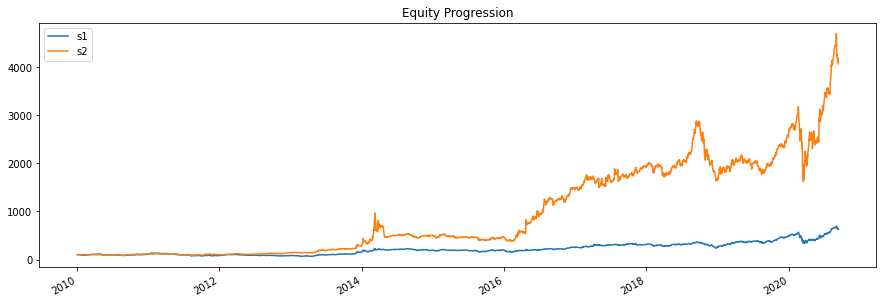

In [ ]:
# first let's see an equity curve
res.plot()

## История распределения весов в портфеле второй оптимизирующей стратегии

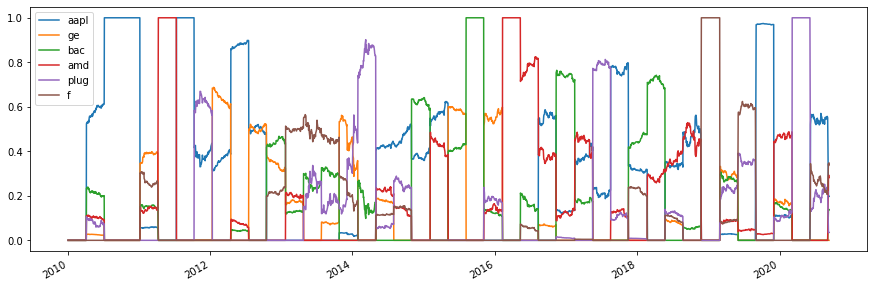

In [ ]:
res.plot_security_weights('s2')

## Количественные итоги по обеим стратегиям

In [ ]:
res.display()

Stat                 s1          s2
-------------------  ----------  ----------
Start                2010-01-03  2010-01-03
End                  2020-09-11  2020-09-11
Risk-free rate       0.00%       0.00%

Total Return         530.72%     3970.37%
Daily Sharpe         0.72        0.97
Daily Sortino        1.19        1.75
CAGR                 18.80%      41.45%
Max Drawdown         -50.58%     -60.73%
Calmar Ratio         0.37        0.68

MTD                  -6.52%      -9.58%
3m                   40.11%      41.67%
6m                   54.26%      83.28%
YTD                  31.04%      58.42%
1Y                   65.21%      103.82%
3Y (ann.)            27.65%      32.59%
5Y (ann.)            30.00%      57.65%
10Y (ann.)           21.28%      45.65%
Since Incep. (ann.)  18.80%      41.45%

Daily Sharpe         0.72        0.97
Daily Sortino        1.19        1.75
Daily Mean (ann.)    21.90%      45.19%
Daily Vol (ann.)     30.53%      46.52%
Daily Skew           0.10        2.8